## 获得前n个主成分

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0., 100., size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100)

In [19]:
def demean(X):
    resX = np.empty(X.shape)
    for i in range(X.shape[1]):
        resX[:,i] = X[:,i] - np.mean(X[:,i])
    return resX

In [20]:
X = demean(X)

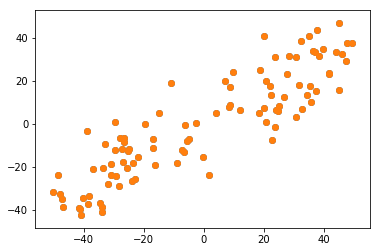

In [23]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [24]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    
    w = direction(initial_w) 
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) 
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
            
        cur_iter += 1

    return w

In [25]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([ 0.79452849,  0.60722688])

In [28]:
np.abs(X.dot(w))

array([ 22.27524175,  50.53748328,  55.30272433,  32.93343329,
        30.10214308,  25.0439608 ,  26.17462367,  12.3561623 ,
        23.11924136,  16.88578163,  49.79431186,  17.91463541,
        20.36565562,  56.66595826,  58.27841717,  38.0903888 ,
        52.83599252,  17.15680053,  18.28514951,  48.99742516,
        39.0225322 ,  64.12259073,  52.8844883 ,  39.18571947,
        31.92606273,  60.90346171,  28.400566  ,  45.31108154,
        51.7198915 ,  50.35902556,   2.7440809 ,  30.12363956,
        35.00461743,  31.01038386,  26.85447584,  57.89864935,
        35.86281967,  38.8419818 ,  37.8053676 ,   1.87502   ,
        49.41790432,  32.17308695,  28.7792045 ,  35.75424696,
        34.46041316,  58.83764908,   8.19488496,  49.75512417,
        38.72988013,  26.76204941,  17.89687706,  59.03223298,
        62.15980371,  47.2045763 ,   6.31537972,  60.77029683,
        53.50173112,  13.04385979,   9.37256012,  28.76329485,
        32.55158314,  33.7804606 ,  52.95511493,  17.77

In [36]:
X2 = np.empty(X.shape)
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w

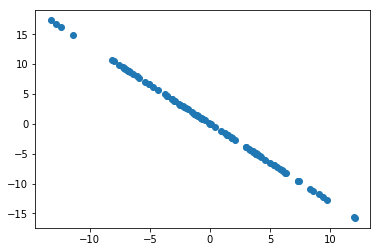

In [38]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [40]:
X2 = X - X.dot(w).reshape(-1, 1) * w

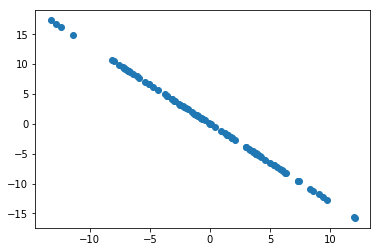

In [41]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [42]:
w2 = first_component(X2, initial_w, eta)
w2

array([ 0.60722844, -0.7945273 ])

In [44]:
w.dot(w2)

1.9619213565413851e-06

In [45]:
def first_n_components(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    X_pca = X.copy()
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [46]:
first_n_components(2, X)

[array([ 0.79452851,  0.60722685]), array([-0.60722395,  0.79453072])]